## Linear regression  
using housing prices dataset

importing the libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data ingestion

In [2]:
read_df = pd.read_csv('train.csv')
df = read_df.copy()

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Feature desc
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


## plotting plot area and price

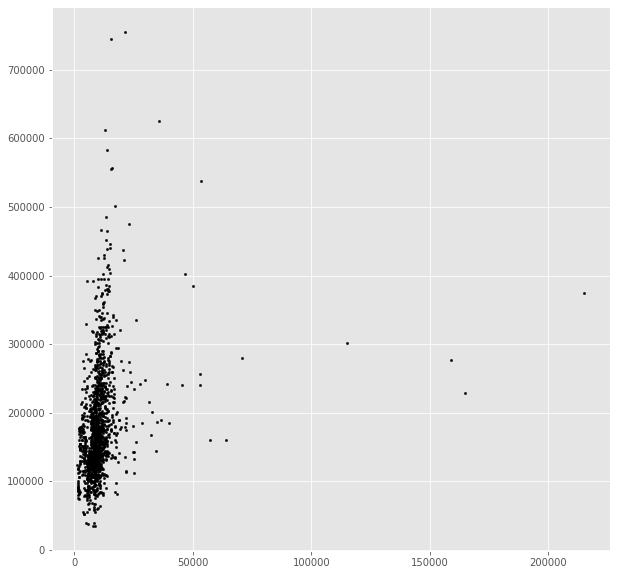

In [5]:
fig = plt.figure(figsize = (10,10))
style.use('ggplot')
plt.scatter(df.LotArea, df.SalePrice, s = 5, c = 'k')

## training set of housing prices
## abbv.  
m = no. of training examples    
x = 'input' variable/features  
y = 'output' variable/'target' variable  
(x,y) = one training example  
(xi,yi) = ith training example

In [6]:
df.shape

(1460, 81)

in this case m = 1460

## structure of learning
notes

hyposthesis(h) maps from x's to y's

## repressentation of h
notes

## linear regression with one variable or univariate linear regression

come up with values of parameters so that the straight line that we get fits all the data-points appropriately.

idea: choose the parameters so that h(x) is close to y for out training example (x,y)

### minimization equation
notes

### cost funtion
notes

cost function is also called squared error cost fn.

we chose squared error cost function because it works well for most regression problems

there are other cost functions also

### cost function intuition

notes

cost functions are 3d plot with parameters on the x and y axis and J the height from the xy-plane.

these are plotted as contour plots with the center of the concentric shapes to be the min. cost

### gradient descent
algorithm for minimizing the cost function J

it is a general algorithm used all over machine learning to reduce not jus the cost function but other fuctions as well

general outline:

1. start with some parameters

2. keep changing parameters so that the value of J(parameters) becomes minimum.

## plotting cost function-surface plot 

In [7]:
m = len(df.LotArea) 

In [8]:
theta_0 = np.linspace(10000, 100000, num = 1000)
theta_1 = np.linspace(5, 10, num = 1000)

In [9]:
Theta_0, Theta_1 = np.meshgrid(theta_0, theta_1)

In [10]:
def cost(theta_0, theta_1, LotArea, SalePrice):
    h = 0
    for i in range(len(LotArea)):
        h += (((theta_0 + (theta_1 * LotArea[i])) - SalePrice[i]) ** 2)
    J = (1/2*len(LotArea)) * h
    return J

Text(0.5, 0, 'J')

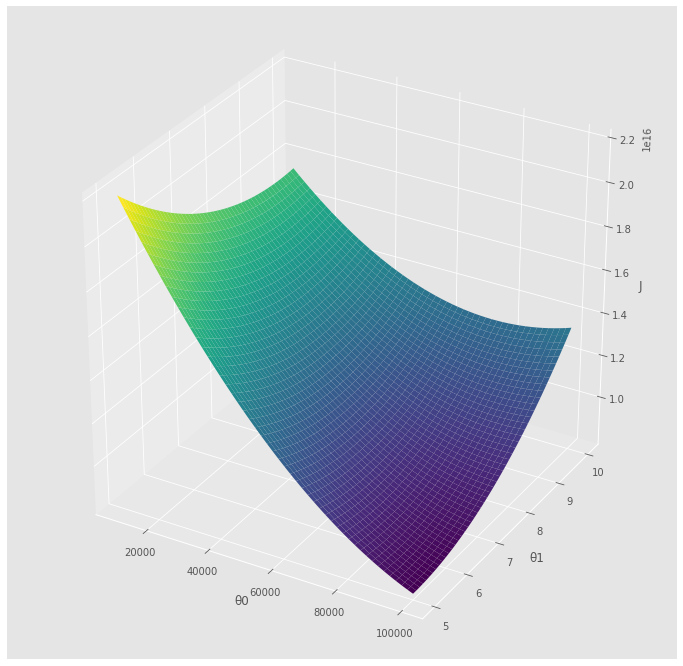

In [11]:
fig = plt.figure(figsize = (12,12))
style.use('ggplot')
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(Theta_0, Theta_1, cost(Theta_0, Theta_1, df.LotArea, df.SalePrice), cmap = 'viridis')
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('J')

## finding the min cost and the corresponding theta_0 and theta_1 values

In [12]:
minj = np.min(cost(Theta_0, Theta_1, df.LotArea, df.SalePrice))

In [13]:
minj

8001625410728889.0

In [14]:
point = np.array(cost(Theta_0, Theta_1, df.LotArea, df.SalePrice)) == minj

In [15]:
position = np.where(point)

In [16]:
position

(array([9]), array([999]))

In [17]:
theta_1_min = Theta_1[9][999]

In [18]:
theta_0_min = Theta_0[9][999]

In [19]:
print(theta_0_min,theta_1_min)

100000.0 5.045045045045045


## plotting the cost function contour plot

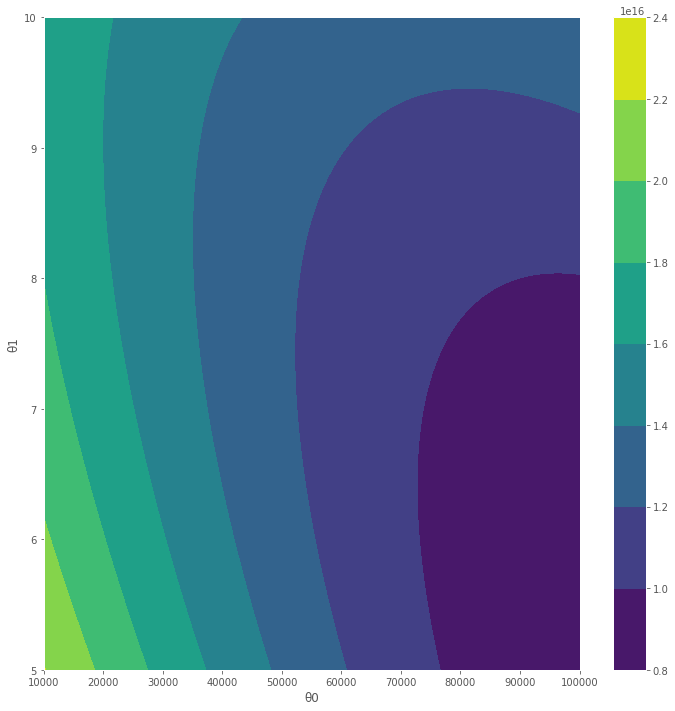

In [20]:
fig = plt.figure(figsize = (12,12))
style.use('ggplot')
ax = fig.add_subplot(111)
cs = ax.contourf(Theta_0, Theta_1, cost(Theta_0, Theta_1, df.LotArea, df.SalePrice))
cbar = fig.colorbar(cs)
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
plt.show()


## plotting the corresponding regression lines for the theta_0 and theta_1 values
the red line represents the line having theta_0 and theta_1 values that gave the min cost

In [21]:
def fitline(theta_0, theta_1, LotArea):
    x = []
    for i in range(m):
        x.append(theta_0 + (theta_1 * LotArea[i]))
    return x
    

1000


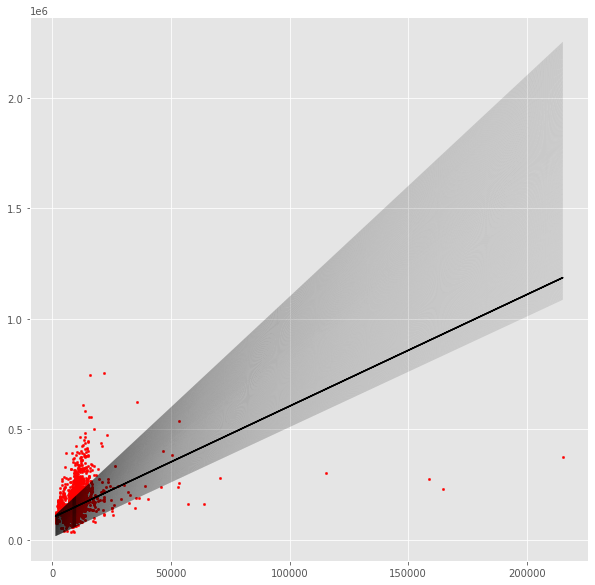

In [22]:
 fig = plt.figure(figsize = (10,10))
style.use('ggplot')
count = 0
for i in range(len(theta_0)):
    plt.plot(df.LotArea,fitline(theta_0[i], theta_1[i], df.LotArea), color = 'k', alpha = 0.1, linewidth = 0.1)
    count += 1
print(count)
plt.scatter(df.LotArea, df.SalePrice, s = 5, c = 'r')
plt.plot(df.LotArea, (theta_0_min + (theta_1_min * df.LotArea)), color = 'k')
plt.show()

## gradient descent algorithm
in notes


## gradient descent for linear regression
in notes

## plotting gradient descent

In [3]:
x = np.array(df.LotArea)
y = np.array(df.SalePrice)

In [4]:
x = preprocessing.scale(x)

In [14]:
theta_0_gd = 0
theta_1_gd = 0
alpha = 0.0001
h_theta_0_gd = 1
h_theta_1_gd = 1
epoch = 0
Epoch = []
m = len(x)
j = 0
J = []

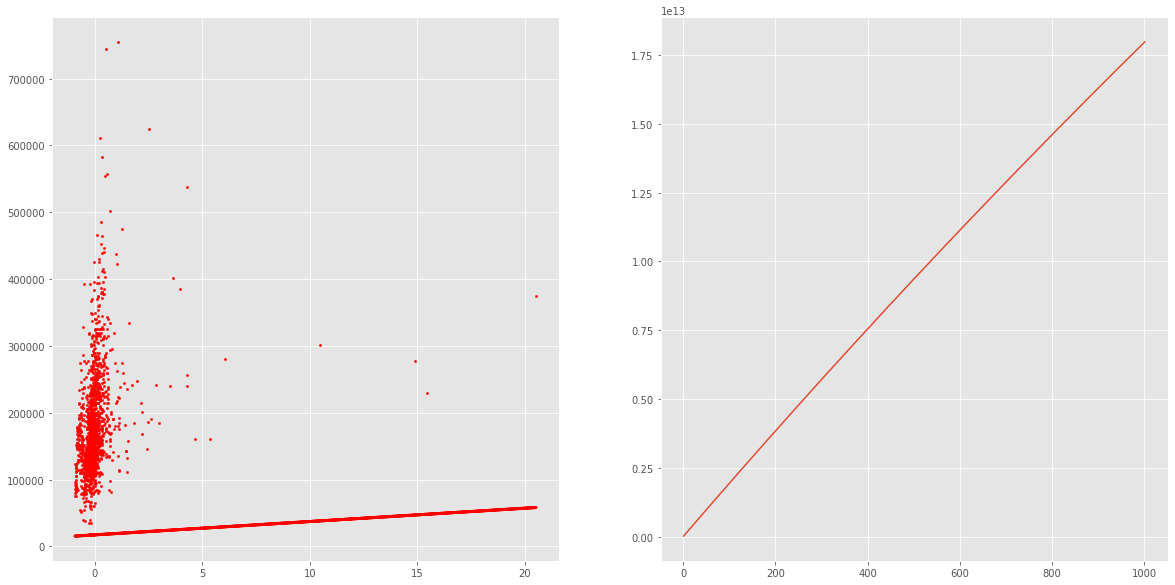

In [15]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
style.use('ggplot')
ax1.scatter(x, y, s = 5, c = 'r')
while h_theta_0_gd != 0 or h_theta_0_gd != 0:
    if epoch > 1000:
        break
    h_theta_0_gd = 0
    h_theta_1_gd = 0
    for i in range(m):
        h_theta_0_gd += (theta_0_gd + (theta_1_gd * x[i]) - y[i])
        h_theta_1_gd += ((theta_0_gd + (theta_1_gd * x[i]) - y[i]) * x[i])
    h_theta_0_gd = (1/m) * h_theta_0_gd
    h_theta_1_gd = (1/m) * h_theta_1_gd
    theta_0_gd -= (alpha * h_theta_0_gd)
    theta_1_gd -= (alpha * h_theta_1_gd)
    for i in range(m):
        j += ((theta_0_gd + (theta_1_gd * x[i]) - y[i]) ** 2)
    J.append((1 / (2 * m)) * j)
    epoch += 1
    Epoch.append(epoch)
ax1.plot(x,(theta_0_gd + (theta_1_gd * x)), color = 'r', linewidth = 3)
ax2.plot(Epoch, J)
plt.show()

## plotting linear regression using sklearn

In [27]:
x_model = np.array(df.LotArea).reshape(-1,1)
y_model = np.array(df.SalePrice).reshape(-1,1)

In [28]:
x_model = preprocessing.scale(x_model)

In [29]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_model, y_model, test_size = 0.33)

In [30]:
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [31]:
accuracy = clf.score(x_test, y_test)

In [32]:
accuracy

0.0534020441741051

In [33]:
theta_1_model = clf.coef_

In [34]:
theta_0_model = clf.intercept_

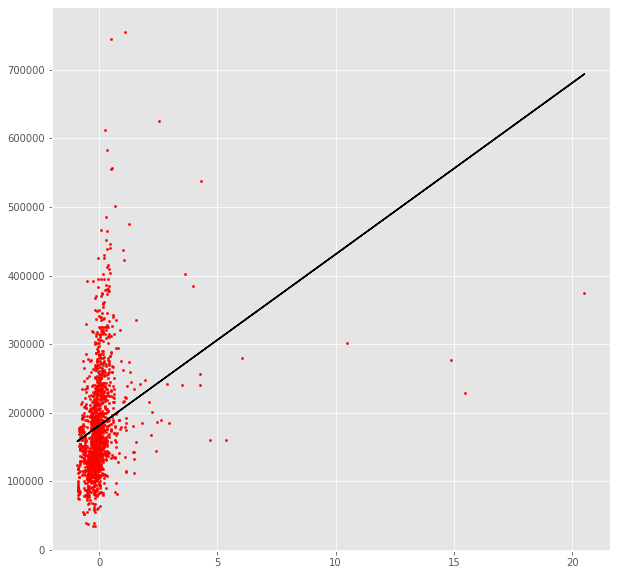

In [35]:
fig = plt.figure(figsize = (10,10))
style.use('ggplot')
plt.scatter(x, y, s = 5, c = 'r')
plt.plot(x_model,(theta_0_model + (theta_1_model * x_model)), color = 'k')

## Linear regression with multiple variables
1. Hypothesis
2. Cost function
3. Gradient Descent
4. Feature scaling
5. Mean normalization
6. Learning rate

## Polynomial regression


## Normal equation
notes


In [36]:
df.LotArea.describe([0.99])

count     1460.000
mean     10516.828
std       9981.265
min       1300.000
50%       9478.500
99%      37567.640
max     215245.000
Name: LotArea, dtype: float64

In [37]:
df.SalePrice.describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

In [38]:
df.SalePrice[df.LotArea == 215245.000000]

313    375000
Name: SalePrice, dtype: int64

In [39]:
df.LotArea[df.SalePrice == 755000.000000]

691    21535
Name: LotArea, dtype: int64

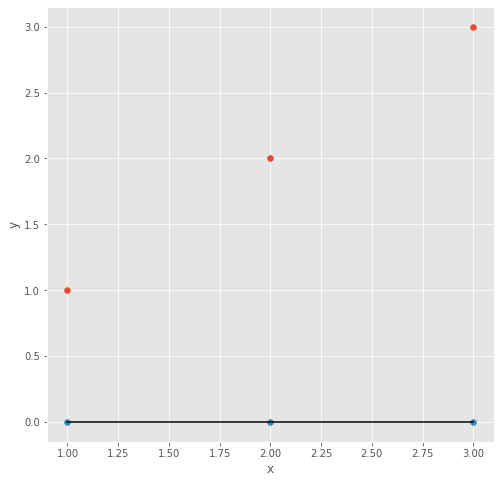

In [40]:
fig = plt.figure(figsize = (8,8))
style.use('ggplot')
x = [1, 2, 3]
y = [1, 2, 3]
h = []
for i in range(len(x)):
    h.append(0*x[i])
plt.scatter(x,y)
plt.scatter(x,h)
plt.plot(x, h, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
theta_1 = np.linspace(-3.5, 5.5, num = 50)  

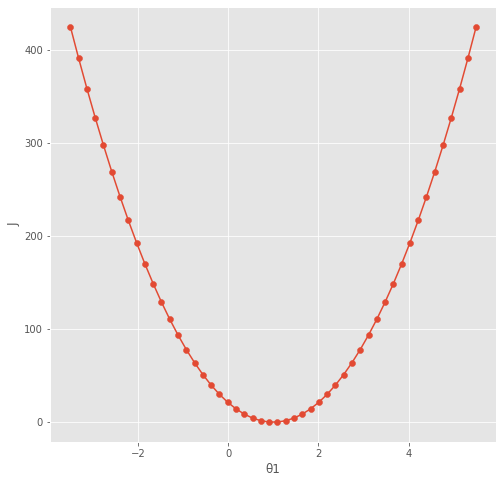

In [42]:
fig = plt.figure(figsize = (8,8))
style.use('ggplot')
plt.scatter(theta_1, cost(0, theta_1, x, y))
plt.plot(theta_1, cost(0, theta_1, x, y))
plt.xlabel('θ1')
plt.ylabel('J')
plt.show()

## Mulitvariate linear regression

In [43]:
df.BedroomAbvGr

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64

In [44]:
df.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

## Gradient descent

In [45]:
x1 = df.LotArea
x2 = df.BedroomAbvGr
x3 = df.YearBuilt

In [46]:
y = df.SalePrice

In [47]:
x1.describe()

count     1460.000
mean     10516.828
std       9981.265
min       1300.000
25%       7553.500
50%       9478.500
75%      11601.500
max     215245.000
Name: LotArea, dtype: float64

In [48]:
x2.describe()

count   1460.000
mean       2.866
std        0.816
min        0.000
25%        2.000
50%        3.000
75%        3.000
max        8.000
Name: BedroomAbvGr, dtype: float64

In [49]:
x3.describe()

count   1460.000
mean    1971.268
std       30.203
min     1872.000
25%     1954.000
50%     1973.000
75%     2000.000
max     2010.000
Name: YearBuilt, dtype: float64

In [50]:
x1_mean = x1.mean()
x2_mean = x2.mean()
x3_mean = x3.mean()

In [51]:
x1_std = x1.std()
x2_std = x2.std()
x3_std = x3.std()

In [52]:
x1 = (x1-x1_mean)/x1_std
x2 = (x2-x2_mean)/x2_std
x3 = (x3-x3_mean)/x3_std

In [ ]:
theta_0 = 0
theta_1 = 0
theta_2 = 0
theta_3 = 0
alpha = 0.01
h_theta_0 = 1
h_theta_1 = 1
h_theta_2 = 1
h_theta_3 = 1
epoch = 0

In [ ]:
while h_theta_0 != 0 or h_theta_1 != 0 or h_theta_2 != 0 or h_theta_3 != 0:
    if epoch > 1000:
        break
    h_theta_0 = 0
    h_theta_1 = 0
    h_theta_2 = 0
    h_theta_3 = 0
    for i in range(m):
        h_theta_0 += (theta_0 + (theta_1 * x1[i]) + (theta_2 * x2[i]) + (theta_3 * x3[i]) - y[i])
        h_theta_1 += ((theta_0 + (theta_1 * x1[i]) + (theta_2 * x2[i]) + (theta_3 * x3[i]) - y[i]) * x1[i])
        h_theta_2 += ((theta_0 + (theta_1 * x1[i]) + (theta_2 * x2[i]) + (theta_3 * x3[i]) - y[i]) * x2[i])
        h_theta_3 += ((theta_0 + (theta_1 * x1[i]) + (theta_2 * x2[i]) + (theta_3 * x3[i]) - y[i]) * x3[i])
    h_theta_0 = (1/m) * h_theta_0
    h_theta_1 = (1/m) * h_theta_1
    h_theta_2 = (1/m) * h_theta_2
    h_theta_3 = (1/m) * h_theta_3
    theta_0 -= (alpha * h_theta_0)
    theta_1 -= (alpha * h_theta_1)
    theta_2 -= (alpha * h_theta_2)
    theta_3 -= (alpha * h_theta_3)
    epoch += 1
print(theta_0, theta_1, theta_2, theta_3)

## Using sklearn

In [78]:
x = np.array(df[['LotArea', 'BedroomAbvGr', 'YearBuilt']])

In [23]:
y = np.array(df.SalePrice)

In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33)

In [25]:
clf = LinearRegression()

In [26]:
clf.fit(x_train,y_train)

LinearRegression()

In [27]:
accuracy = clf.score(x_test, y_test)

In [28]:
print(accuracy)

0.2837160763561568


In [29]:
clf.coef_

array([22438.60570079, 14160.37776126, 43531.52695335])

In [30]:
clf.intercept_

179837.60972269607

## Normal equation

In [71]:
x0 = np.ones(len(df.LotArea))
x1 = np.array(df.LotArea)
x2 = np.array(df.BedroomAbvGr)
x3 = np.array(df.YearBuilt)

In [36]:
y = np.array(df.SalePrice)

In [37]:
X = np.zeros((len(x1),4))

In [38]:
X

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [39]:
for i in range(len(x1)):
    for j in range(4):
        if j == 0:
            X[i][j] = x0[i]
        elif j == 1:
            X[i][j] = x1[i]
        elif j == 2:
            X[i][j] = x2[i]
        elif j == 3:
            X[i][j] = x3[i]

In [40]:
X

array([[1.000e+00, 8.450e+03, 3.000e+00, 2.003e+03],
       [1.000e+00, 9.600e+03, 3.000e+00, 1.976e+03],
       [1.000e+00, 1.125e+04, 3.000e+00, 2.001e+03],
       ...,
       [1.000e+00, 9.042e+03, 4.000e+00, 1.941e+03],
       [1.000e+00, 9.717e+03, 2.000e+00, 1.950e+03],
       [1.000e+00, 9.937e+03, 3.000e+00, 1.965e+03]])

In [41]:
XT = X.transpose()

In [42]:
XT

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [8.450e+03, 9.600e+03, 1.125e+04, ..., 9.042e+03, 9.717e+03,
        9.937e+03],
       [3.000e+00, 3.000e+00, 3.000e+00, ..., 4.000e+00, 2.000e+00,
        3.000e+00],
       [2.003e+03, 1.976e+03, 2.001e+03, ..., 1.941e+03, 1.950e+03,
        1.965e+03]])

In [43]:
XTX = np.matmul(XT,X)

In [44]:
inv = np.linalg.inv(XTX)

In [45]:
inv

array([[ 2.96637622e+00,  5.99804685e-08, -6.94971316e-03,
        -1.49467320e-03],
       [ 5.99804685e-08,  6.98341759e-12, -1.03644081e-08,
        -5.26133148e-11],
       [-6.94971316e-03, -1.03644081e-08,  1.05046233e-03,
         2.05331225e-06],
       [-1.49467320e-03, -5.26133148e-11,  2.05331225e-06,
         7.55524354e-07]])

In [50]:
XTy = np.matmul(XT,y)

In [51]:
XTy

array([2.64144946e+08, 3.08320594e+12, 7.73060443e+08, 5.22530944e+11])

In [60]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [61]:
theta

array([-2.64732929e+06,  1.87045321e+00,  1.73028518e+04,  1.39959760e+03])

In [62]:
theta_0 = theta[0]
theta_0

-2647329.2936654394